<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Custom-Word2Vec" data-toc-modified-id="Custom-Word2Vec-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Custom Word2Vec</a></span></li><li><span><a href="#Preprocess-X" data-toc-modified-id="Preprocess-X-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocess X</a></span><ul class="toc-item"><li><span><a href="#Tokenize-the-Clean,-Combined-Text" data-toc-modified-id="Tokenize-the-Clean,-Combined-Text-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Tokenize the Clean, Combined Text</a></span></li><li><span><a href="#Pad-Sequences-and-Train/Test-Split" data-toc-modified-id="Pad-Sequences-and-Train/Test-Split-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Pad Sequences and Train/Test Split</a></span></li></ul></li><li><span><a href="#Embedding-Layer" data-toc-modified-id="Embedding-Layer-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Embedding Layer</a></span></li><li><span><a href="#Build-the-Model" data-toc-modified-id="Build-the-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Build the Model</a></span></li></ul></div>

<h1>Set your GPU</h1>


<b>Change your runtime to GPU</b>, Ref: https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d
  
  
It is so simple to alter default hardware (CPU to GPU or vice versa); just follow Edit > Notebook settings or Runtime>Change runtime type and select GPU as Hardware accelerator.
  
  <b>Another Tip: How to Clear Outputs of All Cells</b>
Follow Tools>>Command Palette>>Clear All Outputs

<b>Unfortunately</b>... As of this writing Google simply gives only 5% of GPU to some of us, whereas 100% to the others. Period. https://stackoverflow.com/questions/48750199/google-colaboratory-misleading-information-about-its-gpu-only-5-ram-available

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

#if two commas, that means you're using the CPU!


'/device:GPU:0'

In [0]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

!cat /proc/meminfo

MemTotal:       13335212 kB
MemFree:        11126552 kB
MemAvailable:   12212112 kB
Buffers:           40416 kB
Cached:          1243260 kB
SwapCached:            0 kB
Active:           768008 kB
Inactive:        1155576 kB
Active(anon):     618872 kB
Inactive(anon):     2372 kB
Active(file):     149136 kB
Inactive(file):  1153204 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               432 kB
Writeback:             0 kB
AnonPages:        639932 kB
Mapped:           353136 kB
Shmem:              2892 kB
Slab:              85796 kB
SReclaimable:      49760 kB
SUnreclaim:        36036 kB
KernelStack:        4144 kB
PageTables:         6500 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6667604 kB
Committed_AS:    2498988 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
AnonHugePages:         0 kB
ShmemHugePages:  

<h1>Mount your Google Drive</h1>

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
!ls "/content/drive/My Drive"

<h1>`Processing.py` has already preprocessed the three dataframes from Kaggle</h1>

<b>For the original dataset, go to the Kaggle site at: https://www.kaggle.com/stackoverflow/pythonquestions. The processing.py script I wrote reduces the dataframe down to the 10 most frequent tags, applying a series of `pandas`, `numpy`, and `beautifulsoup` cleaning operations, runnable in Python 3.6.</b>

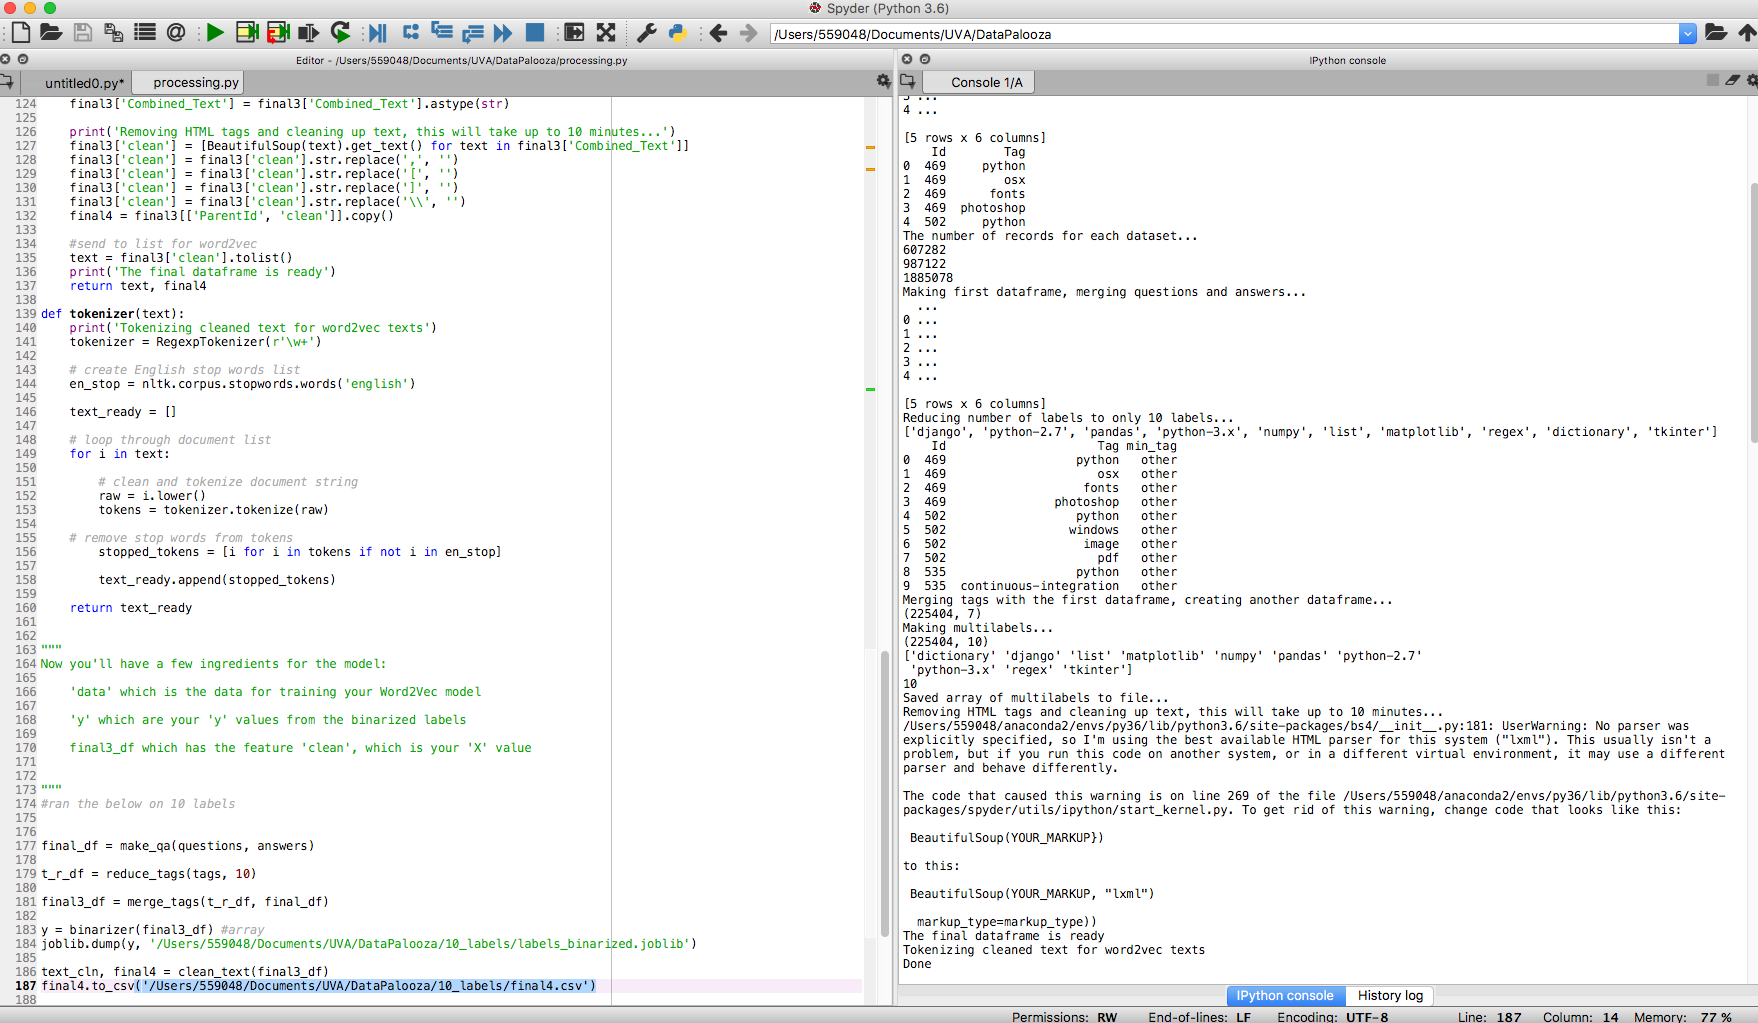

In [0]:
from IPython.display import Image
Image(filename="/content/drive/My Drive/Tutorial/10_labels/processingpy.png")



In [0]:
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.externals import joblib
import pickle

labels_binarized = joblib.load('/content/drive/My Drive/Tutorial/10_labels/labels_binarized.joblib') 

In [0]:
#bring back in labels_binarized, your y

labels_binarized

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [0]:
labels_binarized.shape

(225404, 10)

In [0]:
#bring back in your classes, that map to your labels, y

infile = open('/content/drive/My Drive/Tutorial/10_labels/mlb_classes','rb')
mlb_classes = pickle.load(infile)
infile.close()

In [0]:
mlb_classes

array(['dictionary', 'django', 'list', 'matplotlib', 'numpy', 'pandas',
       'python-2.7', 'python-3.x', 'regex', 'tkinter'], dtype=object)

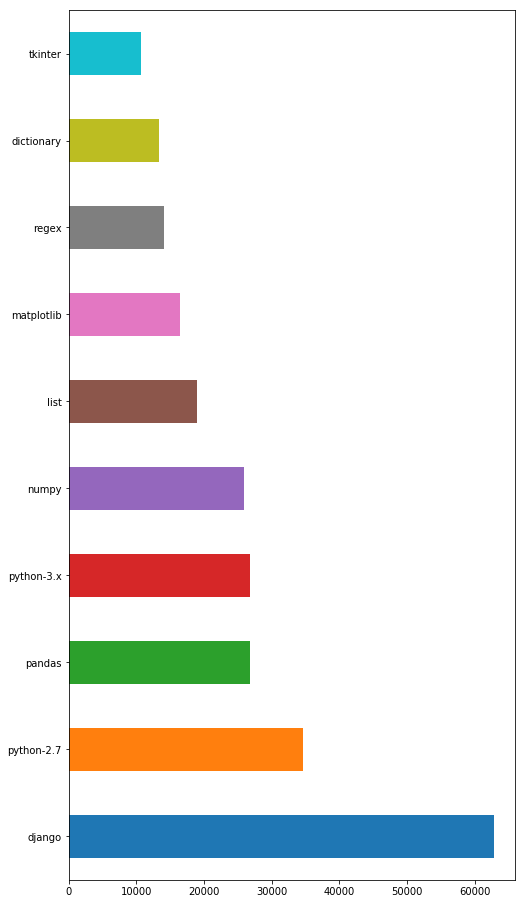

In [0]:
from IPython.display import Image
Image(filename="/content/drive/My Drive/Tutorial/10_labels/10_labels.png")

In [0]:
#bring back in your final dataframe, of which you need final3['clean'], which is your X

import pandas as pd

final3 = pd.read_csv('/content/drive/My Drive/Tutorial/10_labels/final4.csv', index_col = 0)

In [0]:
final3

,ParentId,clean,Tag
0,742,'Class views in Django' 'Django view points to...,['django']
1,1983,'Python: what is the difference between (123) ...,['list']
2,2933,'How can I create a directly-executable cross-...,['tkinter']
3,13791,'Python Regular Expressions to implement strin...,['regex']
4,14281,'Is there a python module for regex matching i...,['regex']
5,14389,'Regex and unicode' 'I have a script that pars...,['regex']
6,19339,'A Transpose/Unzip Function in Python (inverse...,['list']
7,20927,'updating an auto_now DateTimeField in a paren...,['django']
8,21454,'Specifying a mySQL ENUM in a Django model' 'H...,['django']
9,22149,'Unicode vs UTF-8 confusion in Python / Django...,['django']


In [0]:
final3.shape

(225404, 3)

<h1>Word Embeddings</h2>

<h2><font color=#ff0000> </font>Create your own custom embedding using Word2Vec</h2> 

The `gensim` implementation is based on the Skip-Gram model. Word2Vec and GloVe are unsupervised methods based on the distributional hypothesis, i.e. words that occur in the same contexts tend to have similar meanings.  These "learnings" are in the form of word vectors, which are a representation, essentially a way to encode words and sentences into arrays. Word2Vec paper here by Mikolov, 2013: https://arxiv.org/pdf/1301.3781.pdf <br>

<b>After training the vocabulary of all the words in the StackOverflow questions on the Skip Gram, you'll get a vector representation of each word. Each word below will be represented by float values that are coordinates of the words in an n dimensional space (n=150, in our case).</b><br>

`I am taking a ["..."] class this semeseter called Calcuus 1` <br>

<b>The word is clearly `math` but it could also be `mathematics` or even `calculus`. The relationship of how these words are similar to each other is based on the Distributional Hypothesis.<br>
  
 The objective is given $$w_c$$, predict $$w_{c_k},..., w_{c-1}, w{c+1}, ..., w_{c+k}$$
 
  Where `c` is the window for the number of words around the target word of interest, in our case below, I chose c = 10. 

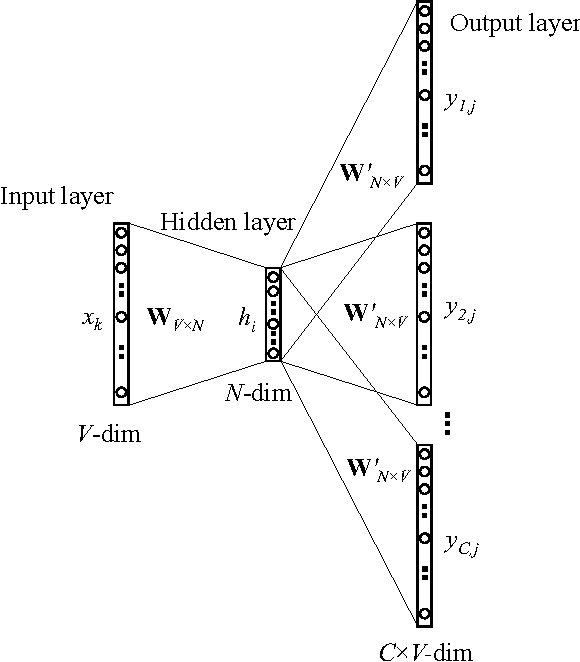

In [0]:
Image(filename="/content/drive/My Drive/Tutorial/10_labels/skipgrams.png")



*Figure 1: A neural language model (Bengio et al., 2006)*

Per Sebastian Ruder: http://ruder.io/word-embeddings-1/

"Note that we need to calculate the probability of every word  w at the output layer of the neural network. To do this efficiently, we perform a matrix multiplication between h and a weight matrix whose rows consist of v′w of all words w in V. We then feed the resulting vector, which is often referred to as a logit, i.e. the output of a previous layer that is not a probability, with d = |V| into the softmax, while the softmax layer "squashes" the vector to a probability distribution over the words in V."

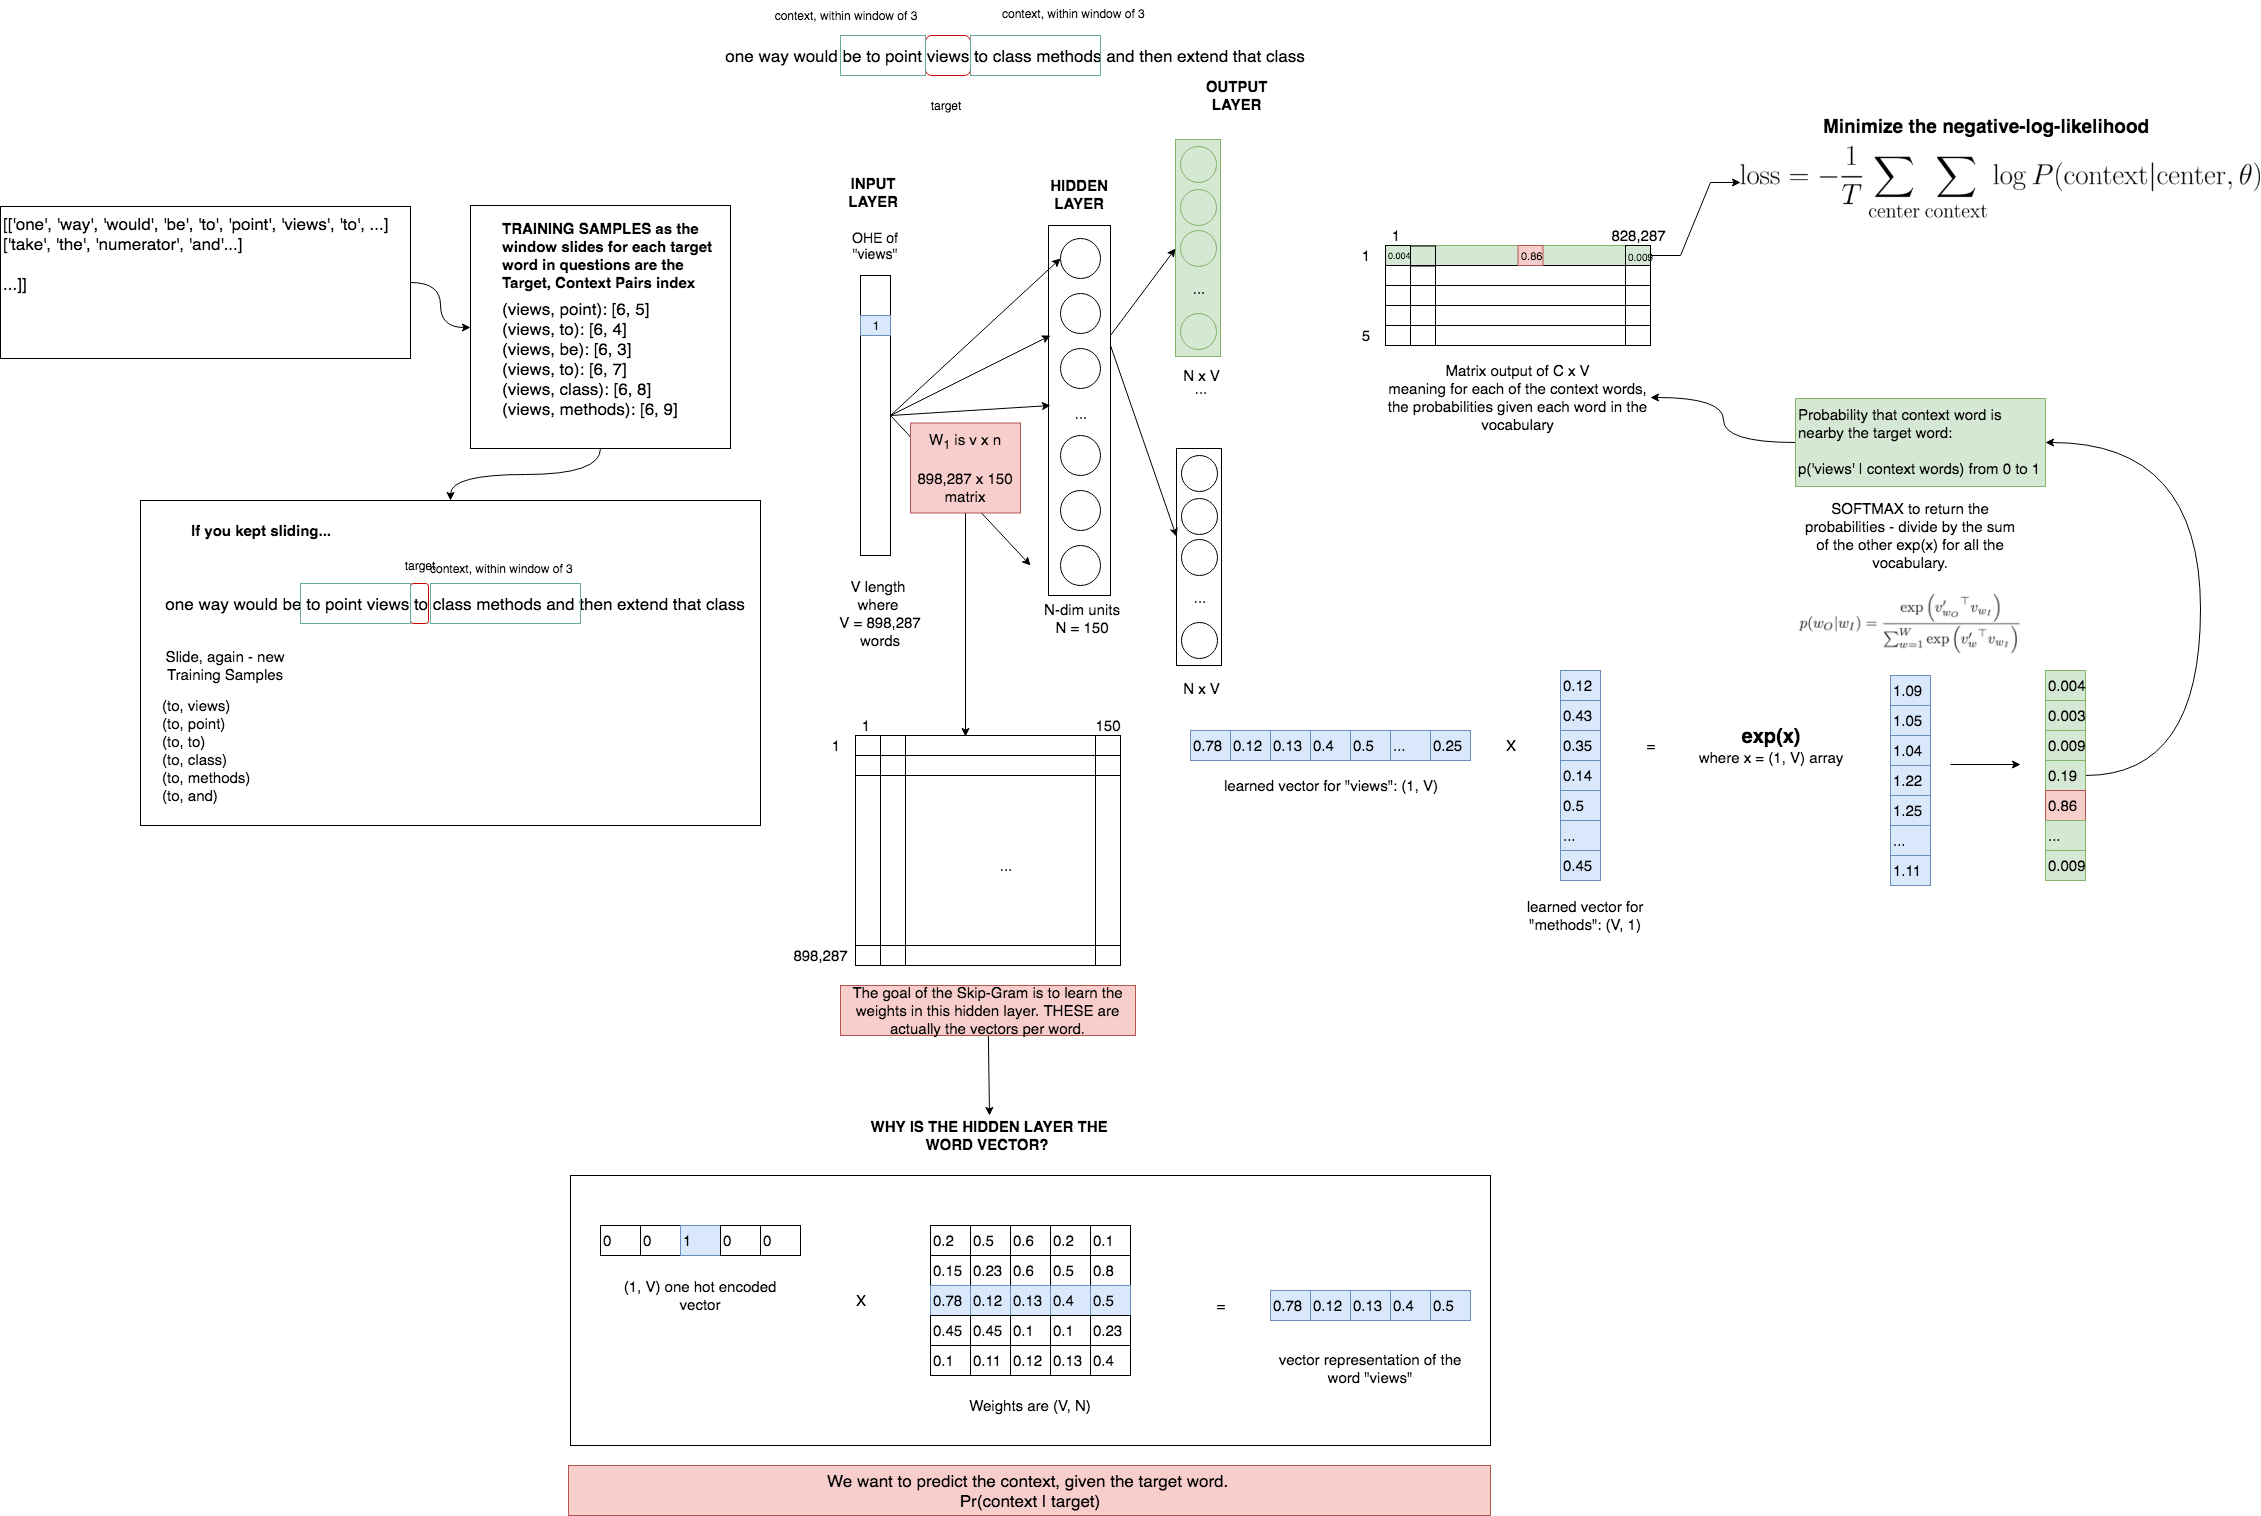

In [0]:
Image(filename="/content/drive/My Drive/Tutorial/10_labels/w2v.png")

<b>If you want to try and train the Word2Vec model differently, run the below cells. First import `gensim` and `Cython`; Next, import the list of lists file called `data_for_w2v` already processed from `processing.py` from the corpus of records with 10 labels. Then modify any of the model parameters below. Else, just skip these two and directly load the model I ran.</b>
    


In [0]:
#download necessary packages
#do this even if you are using my saved model 

import sys
!{sys.executable} -m pip install gensim
!{sys.executable} -m pip install Cython

In [0]:
###ONLY RUN THIS IF YOU WANT TO TRAIN W2V FROM SCRATCH WITH THIS DATA###

#bring back in your data, which is to train your Word2Vec Model

infile = open('/content/drive/My Drive/Tutorial/10_labels/data_for_w2v','rb')
data = pickle.load(infile)
infile.close()

In [0]:
data

In [0]:
###ONLY RUN THIS IF YOU WANT TO TRAIN W2V FROM SCRATCH WITH THIS DATA###

import gensim 
from gensim.models import Word2Vec

# build vocabulary and train model
model = gensim.models.Word2Vec(
        data,
        size=150,
        window=10,
        min_count=2,
        workers=10)
model.train(data, total_examples=len(data), epochs=10)

<h1><font color=#ff0000>Import Word2Vec Model custom trained on Stackoverflow Corpus, 5 epochs</h1></font>

In [0]:
###OTHERWISE, JUST IMPORT THE MODEL I ALREADY RAN FOR YOU###

#import the model I already trained on our 10-label corpus
import gensim 
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors

custom_w2v = Word2Vec.load("/content/drive/My Drive/Tutorial/10_labels/word2vec.model")

In [0]:
# summarize the loaded model
print(custom_w2v)
# summarize vocabulary


Word2Vec(vocab=898287, size=150, alpha=0.025)


In [0]:
words = list(custom_w2v.wv.vocab)
len(words)

898287

In [0]:
words

['class',
 'views',
 'django',
 'view',
 'points',
 'function',
 'problem',
 'want',
 'change',
 'bit',
 'functionality',
 'yes',
 'could',
 'million',
 'keyword',
 'arguments',
 'even',
 'statements',
 'thinking',
 'object',
 'oriented',
 'approach',
 'rnrnfor',
 'example',
 'page',
 'displays',
 'user',
 'similar',
 'group',
 'still',
 'use',
 'another',
 'data',
 'model',
 'also',
 'members',
 'etc',
 'way',
 'would',
 'point',
 'methods',
 'extend',
 'anyone',
 'tried',
 'idea',
 'sounds',
 'like',
 'trying',
 'combine',
 'things',
 'combined',
 'need',
 'different',
 'processing',
 'depending',
 'look',
 'two',
 'functions',
 'rnrnon',
 'hand',
 'common',
 'idioms',
 'extract',
 'object_detail',
 'type',
 'perhaps',
 'decorator',
 'helper',
 'rnrn',
 'dan',
 'simply',
 'displaying',
 'models',
 'generic',
 'designed',
 'let',
 'easy',
 'show',
 'without',
 'write',
 'stuff',
 'mapping',
 'url',
 'paramaters',
 'fetching',
 'handling',
 'edge',
 'cases',
 'rendering',
 'output',
 '

In [0]:
# access vector for one word
word1 = 'sql'
custom_w2v.wv.most_similar(positive=word1)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('query', 0.6843087077140808),
 ('subquery', 0.6248834133148193),
 ('eggpymysqlconnections', 0.6203315258026123),
 ('ztt_', 0.6137741804122925),
 ('queries', 0.6039690971374512),
 ('orm', 0.6037570238113403),
 ('nnsql', 0.6028485298156738),
 ('ddl', 0.5939515233039856),
 ('alchemy', 0.591830313205719),
 ('read_query', 0.5865325927734375)]

In [0]:
#each term has an associated vector, 150 dimensions long in this case, of weights for words it is related to
custom_w2v.wv.word_vec('sql')

array([-3.0455378e-01,  2.9992323e+00, -1.7882317e-01, -1.4104525e+00,
        2.1739516e+00,  1.0548495e-01, -4.0301219e-01, -1.8141696e+00,
       -1.7865820e+00,  2.6951547e+00,  2.4399784e+00,  2.4465861e+00,
        5.7197154e-01,  1.1683869e+00, -2.5322266e+00,  9.0297407e-01,
        5.8560658e-01, -7.3024309e-01, -4.5663589e-01,  9.6700233e-01,
       -4.0556285e-01, -2.9863451e+00,  4.5699868e+00, -1.2451373e+00,
       -8.0221021e-01,  1.6025816e+00, -2.6226234e+00,  3.0857072e+00,
       -1.4760911e+00,  3.3503017e+00,  4.3224292e+00,  3.2929335e-02,
       -1.6528208e+00, -2.1830294e+00,  9.3940806e-01, -2.7875311e+00,
       -1.0072862e+00, -1.9665267e+00,  3.0061095e+00, -7.8854233e-01,
       -2.7312319e+00, -2.6070728e+00, -7.0016670e-01,  2.1587169e+00,
       -2.5174363e+00,  1.0139676e+00,  2.6352153e+00,  8.8955426e-01,
        1.4638634e+00,  1.2439170e+00,  1.6251233e+00,  1.4094514e+00,
        6.9970059e-01, -3.1517425e+00,  3.4327602e+00,  2.9289588e-01,
      

Cosine similarity between their corresponding word vectors

In [0]:
distance = custom_w2v.wv.distance("sql", "database")
print("{:.1f}".format(distance))

0.5


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
distance = custom_w2v.wv.distance("sql", "oracle")
print("{:.1f}".format(distance))

0.6


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
distance = custom_w2v.wv.distance("sql", "angular")
print("{:.1f}".format(distance))

0.9


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
distance = custom_w2v.wv.distance("sql", "lstm")
print("{:.1f}".format(distance))

1.0


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


<h2>(Optional)Use GloVe Word Embeddings to build an Embedding Matrix: Weights</h2>

Like word2vec that we used in H2O, we're going to use GloVe: https://nlp.stanford.edu/projects/glove/

<u>Word2Vec</u> is a neural network that predicts the context of a word with respect to other words. Every word in a Word2Vec model has a weight. It goes from the <b>embedding (the small vector of words)</b> to the context (the output/weights).<p>

<u>GloVe,</u> on the other hand, uses matrix factorization to decompose a co-occurence matrix. A co-occurence matrix counts up the number of times each word in an Amazon Review appear with other words: how many times does 'greenie' occur with 'dog' versus 'greenie' occurs with 'chocolate'. This table could be really big like 100,000 by 100,000 words! But if you decompose it to two smaller matrices, it will give you the meaning of each word through the dot product and the embedding.<p>

The GloVE embedding matrix we are using has been trained on the combined Gigaword 5 + Wikipedia 2014 set. It contains 6B tokens, 400K vocab, uncased, 50d, 100d, 200d, & 300d vectors. You can download it yourself, but I have provided the specific file for you. It is a 822 MB download = glove.6B.zip.

<img src="https://4.bp.blogspot.com/-95QD5t9Lha4/Wd7uWnBZBeI/AAAAAAAADg4/xB4VnnxM0UgUp15lNmB3aHCXYGejpm4OACLcBGAs/s1600/matrix_factorization.png">

macheads101 gives a good tutorial explanation: https://www.youtube.com/watch?v=5PL0TmQhItY

In [0]:
#Glove Model

#compute an index mapping words to known embeddings

embeddings_index = {}
f = open("/content/drive/My Drive/Tutorial/10_labels/glove.6B.100d.txt")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

In [0]:
embeddings_index

<h1>Preprocess X</h1>

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
import tensorflow as tf

Using TensorFlow backend.


In [0]:
X = final3['clean']
y = labels_binarized

<h2>Tokenize the Clean, Combined Text</h2>

In [0]:
MAX_NUM_WORDS = 10000 #num_words: None or int. Maximum number of words to work with 
MAX_SEQUENCE_LENGTH = 1000 #maximum number of words in a sentence we'll analyze
EMBEDDING_DIM = 100

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(nb_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/text.py:177: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


Found 2170494 unique tokens.


In [0]:
X[0]

In [0]:
sequences[0]

In [0]:
word_index 

In [0]:
print(list(word_index.keys())[list(word_index.values()).index(5214)])
print(list(word_index.keys())[list(word_index.values()).index(349)])
print(list(word_index.keys())[list(word_index.values()).index(5)])
print(list(word_index.keys())[list(word_index.values()).index(1526)])
print(list(word_index.keys())[list(word_index.values()).index(242)])
print(list(word_index.keys())[list(word_index.values()).index(247)])
print(list(word_index.keys())[list(word_index.values()).index(541)])

<h2>Pad Sequences and Train/Test Split</h2>

In [0]:
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

#alreay categorical
labels = y

print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)


In [0]:
#before shuffling

data[:10]

<h3>Set aside 1000 records for testing</h3>

In [0]:
Image(filename="/content/drive/My Drive/Tutorial/10_labels/UVA_test split.png")

In [0]:
#reserve last 1000 for test set

test_data = data[-1000:]
test_labels = labels[-1000:]
print(test_data.shape)
print(test_labels.shape)

In [0]:
training_data = data[:(len(data) - len(test_data))]
print(training_data.shape)
training_labels = labels[:(len(labels) - len(test_labels))]
print(training_labels.shape)

<b>Now split the training set into `train` and `validation` </b>

In [0]:
# split the data into a training set and a validation set

#frst shuffle the data
indices = np.arange(training_data.shape[0])
np.random.shuffle(indices)

training_data = training_data[indices] #features
training_labels = training_labels[indices] #labels

#split it 80/20
nb_validation_samples = int(0.2 * training_data.shape[0])

In [0]:
x_train = training_data[:-nb_validation_samples]
y_train = training_labels[:-nb_validation_samples]
x_valid = training_data[-nb_validation_samples:]
y_valid = training_labels[-nb_validation_samples:]
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

<h1>Embedding Layer</h1>

<b>We now use these word vectors as the features which is the "embedding matrix" that we'll create. We are transforming a 1D dataset (e.g. the integer representing the word), into a vector space where each word now has the weights from the hidden layer in our Skip Gram model - all the weights representing the conditional probabilities of the context words given the target word of interest. 
  
The values in this matrix are weights that represent assocations with other words in the corpus. We find each word in our training set, retrieve its word vector, and build them into an embedding layer.</b>


In [0]:
from keras.layers import Embedding

In [0]:
len(word_index) #2,170,494 words that are encoded to an integer

<b><font color=#ff0000>Below are for trying out GloVE, only if you ran the optional Glove embedding above, else go below</b>

In [0]:
#####GLOVE EMBEDDING MATRIX

EMBEDDING_DIM = 100


# prepare embedding matrix
num_words = min(MAX_NUM_WORDS, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector


In [0]:
####GLOVE EMBEDDING MATRIX 


from keras.layers import Embedding
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

<h1><font color=#ff0000>Run for the Word2Vec Embedding</h1></font>

In [0]:
from keras.layers import Embedding

MAX_NUM_WORDS = 10000 #num_words: None or int. Maximum number of words to work with 
MAX_SEQUENCE_LENGTH = 1000 #maximum number of words in a sentence we'll analyze
EMBEDDING_DIM = 150

num_words = (len(word_index) + 1) 

embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM)) 

for word, i in word_index.items(): #look up each word in the word_index
    if word in custom_w2v.wv.vocab: #if it's in the trained word vector...
        embedding_matrix[i] = custom_w2v.wv.word_vec(word) #then insert the vector - the entire embedding_dim into the row


print(embedding_matrix.shape)

embedding_layer = Embedding(embedding_matrix.shape[0], # or len(word_index) + 1 = the number of "rows"
                            embedding_matrix.shape[1], # or EMBEDDING_DIM = the number of "columns" / features
                            weights=[embedding_matrix],# all the values in each cell
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False) #setting trainable to false means to freeze this layer and don't allow updates

<h1>Build the Model</h1>

Add here

In [0]:
Image(filename="/content/drive/My Drive/Tutorial/10_labels/mylstm.png")

In [0]:
Image(filename="/content/drive/My Drive/Tutorial/10_labels/lstm.png")

In [0]:
from keras import layers
from keras import models
from keras import optimizers 
from keras.models import Model
from keras.layers import Dense, Activation

<b>STOP! <p>
  
 Run the below two cells <u> ONLY IF </u> you decided to train this model from scratch. Otherwise, go down to loading the pre-trained model I ran for you.</b>

In [0]:
## create the model
## WAIT! You don't need to run this cell if you're loading in the pre-trained model
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(Embedding(num_words, 
                    EMBEDDING_DIM, 
                    weights=[embedding_matrix], 
                    input_length=MAX_SEQUENCE_LENGTH, 
                    trainable=False))  #set to False so this layer's weights won't be a part of the back prop
model_lstm.add(LSTM(100))
model_lstm.add(Dense(len(labels[0]), activation='sigmoid'))

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model_lstm.summary())

In [0]:
### WAIT!
####ONLY RUN THE BELOW IF YOU'RE TRAINING FROM SCRATCH NOT/NOT USING THE PRETRAINED MODEL - WILL TAKE UP TO 45 TO RUN###

history = model_lstm.fit(x_train, 
                         y_train, 
                         validation_data=(x_valid, y_valid),
                         epochs=5, 
                         batch_size=320)

<b>Always save your model!</b> Tip: Alternative is you can use the `callbacks` function in Keras for early stopping.

In [0]:
###If you do decide to train your own model, note there are millions of parameters and it will take a long time to train
###So, save your model ahead of time
###To be safe, you can also add a 'callbacks' parameter in your fit statement so that any time the loss begins to increase, your model will be automatically saved

from keras.models import load_model
#model_lstm.save('/content/drive/My Drive/Tutorial/10_labels/lstm_Oct302018.h5')

In [0]:
Image(filename="/content/drive/My Drive/Tutorial/10_labels/loss_curve_lstm.png")

In [0]:
### If you train on your own model, you can view th accuracy and loss curves below based on the history

import matplotlib.pyplot as plt
%matplotlib inline


loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
Image(filename="/content/drive/My Drive/Tutorial/10_labels/accuracy_curve_lstm.png")

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

In [0]:
##only run if you want to retrieve the accuracy score on the validation set
score = model_lstm.evaluate(x_valid, y_valid) #approximately 10 minutes
print(score)

<h1><font color=#ff0000>At this point, you should load the pre-trained model</h1></font> I ran this model on a GeForce GTX TITAN X which took about 45 minutes. You need to run the above cell, first, to compile. 

<b><font color=#ff0000>Load the pre-trained model.</b></font>

In [0]:
from keras.models import load_model
model_lstm= load_model('/content/drive/My Drive/Tutorial/10_labels/model_lstm.h5')

<b>At this point, there's a chance your Google Notebook is going to give you a warning about how you're hitting the memory restriction. Just keep click 'Ignore', because from this point on, we're going to be dealing with small numpy calculations.</b>

In [0]:
model_lstm  

<h1>Predict</h1>

<b>Remember the test set we generated earlier on?  Let's go ahead and make predictions on them.</b>

In [0]:
test_data.shape


In [0]:
test_data

In [0]:
test_labels

<b>Process the dataframe in the same way we processed our training set.</b>

In [0]:
###MAKE PREDICTIONS ON THE FIRST 100 SAMPLES###

predictions = model_lstm.predict(test_data) 
predictions

<b>NOTE: If the prediction times you out, you can either rerun this entire notebook again (Ugh!), or scroll all the way to the bottom of this notebook and read in the pickle'd saved arrays for the predictions.</b>

In [0]:
mlb_classes

In [0]:
#manually created this 

mlb_dict = {0:'dictionary', 
           1:'django', 
           2:'list', 
           3:'matplotlib',
           4:'numpy', 
           5:'pandas', 
           6: 'python-2.7', 
           7:'python-3.x', 
           8:'regex', 
           9:'tkinter'}

In [0]:
#slice the matrix to get the first array

predictions[:, :][0]

In [0]:
#slice the matrix to get the second array

predictions[:, :][1]

In [0]:
#function - for every element in the array 

def thresh_and_sort(predictions, thresh):
    #arrange the values that are above a threshold
    holder = []
    for i in range(0, len(predictions)):
        x = predictions[:, :][i]
        idx = np.arange(x.size)[x > thresh]
        almost = idx[np.argsort(x[idx])[::-1]]
        holder.append(almost)
    return holder

In [0]:
sorted_predictions = thresh_and_sort(predictions, 0.25) #you can change this threshold
sorted_predictions

In [0]:
#We have a list of arrays


my_prediction_list = [l.tolist() for l in sorted_predictions]
my_prediction_list


In [0]:
#iterat through our list and replace the items with the dictionary keys

my_list = my_prediction_list
my_dict = mlb_dict

def replace(item):
    if item in my_dict:
        return my_dict[item]
    else:
        return item
    
new_list=[];

for item in my_list:
    if isinstance(item,list):
        temp_list=[]
        for subitem in item:
            temp_list.append(replace(subitem))
        new_list.append(temp_list)
    else:
        new_list.append(replace(item))

prediction_tags = new_list
prediction_tags

<h2>Verify against our test labels</h2>

In [0]:
test_set_df = final3.tail(1000) #remember, the last 1000 records of X traces back to the last 1000 records of the original dataframe we brought in
test_set_df

In [0]:
test_labels[0] # index 1 is 'django'

In [0]:
test_labels[1] #index 5 is 'pandas'

In [0]:
test_labels[2] #index 9 is 'tkinter'

In [0]:
test_labels[3] #index is 1 is 'django'

In [0]:
test_labels[4] #index 0 is 'dictionary', index 5 is 'pandas'

In [0]:
test_set_df.head() #should match up

<b>For organization, let's convert everything into a dataframe</b>

In [0]:
#the predictions
df_prediction_tags = pd.DataFrame([[prediction_tags[i]] for i in range(len(prediction_tags))], columns=['Predictions'])

#the actuals
df_actual_tags = pd.DataFrame(test_set_df['Tag'])
df_actual_tags.rename(columns = {'Tag':'Actual'}, inplace = True) 
df_actual_tags.reset_index(inplace=True)

#concatenate them together
Evaluation = pd.concat([df_actual_tags, df_prediction_tags], axis=1)
Evaluation.drop(['index'], axis=1, inplace=True)
Evaluation['Predictions']= Evaluation['Predictions'].astype(str, inplace=True)
Evaluation

In [0]:
a = test_set_df[['ParentId', 'clean']].reset_index()
p = Evaluation.reset_index()

predictions_for_plotly =  pd.concat([a,p], axis=1)
predictions_for_plotly.drop(['index'], axis=1, inplace=True)
predictions_for_plotly

In [0]:
predictions_for_plotly.to_csv('/content/drive/My Drive/Tutorial/10_labels/predictions_for_plotly.csv', index=0)

In [0]:
import pickle 

infile = open('/content/drive/My Drive/Tutorial/10_labels/predictions','rb')
predictions = pickle.load(infile)
infile.close()

infile = open('/content/drive/My Drive/Tutorial/10_labels/test_data','rb')
test_data = pickle.load(infile)
infile.close()

infile = open('/content/drive/My Drive/Tutorial/10_labels/test_labels','rb')
test_labels = pickle.load(infile)
infile.close()